<a href="https://colab.research.google.com/github/Shprygin/Portfolio/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deadline 23.01.2022

# Intro to NN
This is the first project. Binary classification problem. Techniwues employed: LogReg, decision tree/forest, NN with 3 dense layers and sigmoid activation function


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/data.csv',index_col=0)

In [5]:
df.describe()

,x1,x2,y
count,10000.000000,10000.000000,10000.000000
mean,-0.029488,-0.098799,0.509700
std,4.981907,5.022414,0.499931
min,-9.988732,-9.972095,0.000000
25%,-4.062951,-4.170403,0.000000
50%,-0.063085,-0.097836,1.000000
75%,4.016095,3.880448,1.000000
max,9.985560,9.982304,1.000000


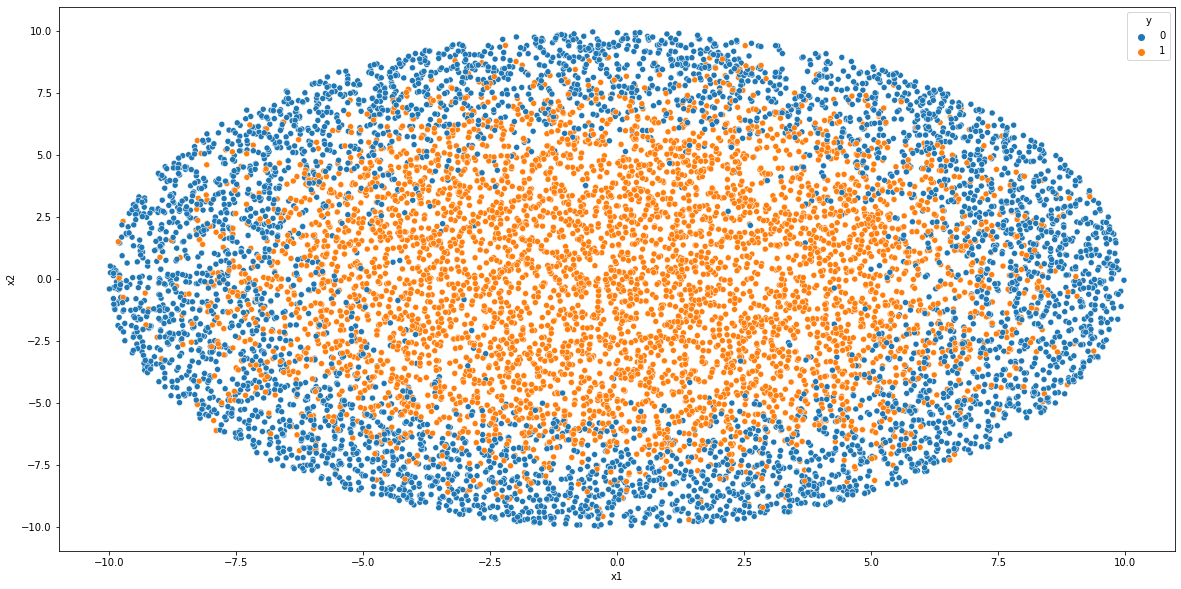

In [6]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)



**1.   LogReg**




In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33)

model accuracy 0.5448484848484848


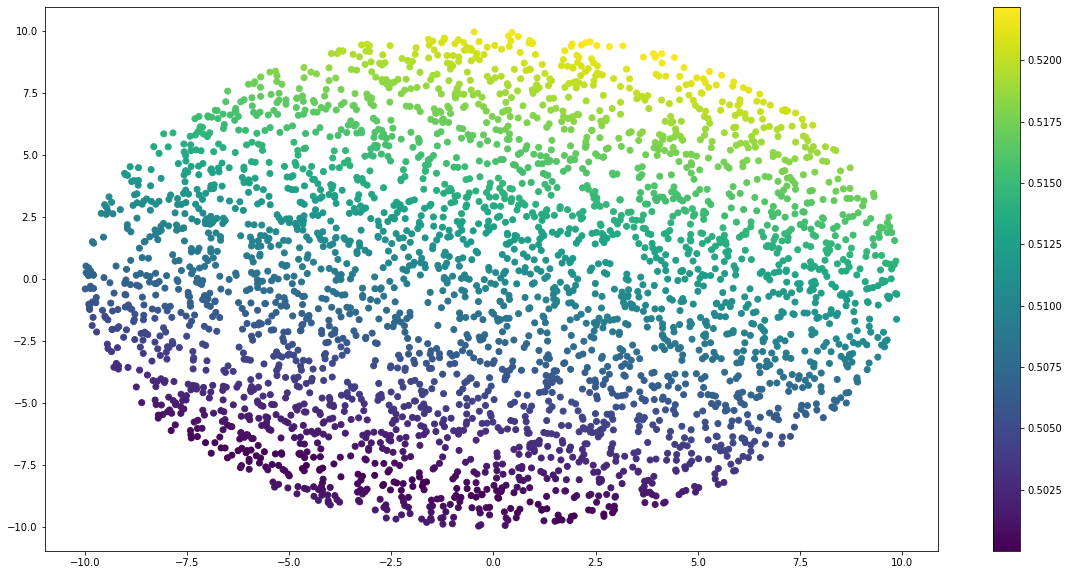

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

logreg = LogisticRegression( )
logreg.fit(X_train, y_train)

predict_logit =  logreg.predict(X_test)
predict_log_proba = [max(x) for x in logreg.predict_proba(X_test)]

#########################################


print(f'model accuracy {accuracy_score(predict_logit, y_test)}')


plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_log_proba)
plt.colorbar()
plt.show()

Adding new artificial variable to boost performance

Model accuracy 0.7175757575757575


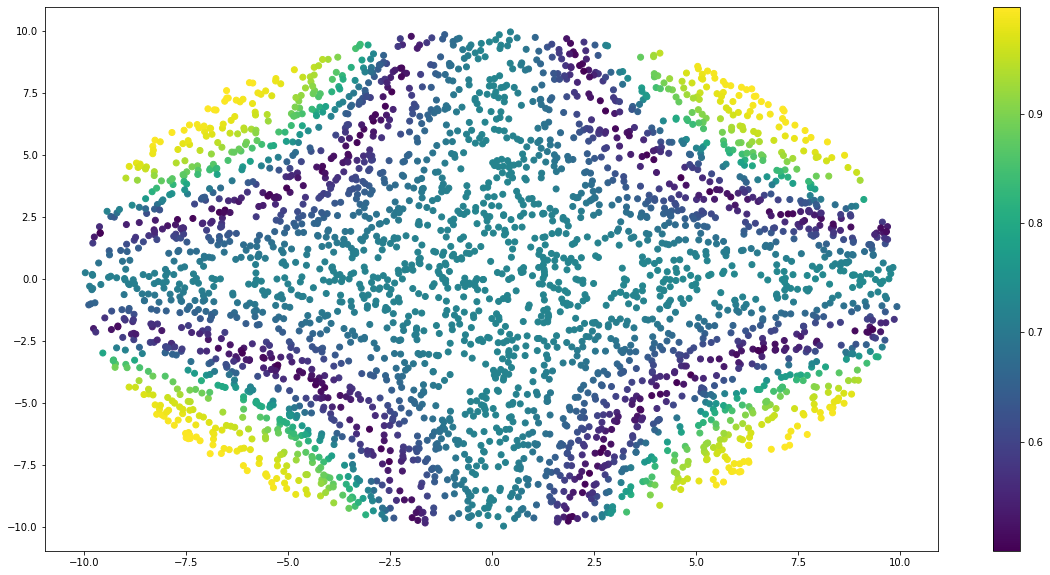

In [26]:
df_new = df.copy()


df_new['new_feature_1'] = (df_new['x1']**2) * (df_new['x2']**2)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1']],
                                                                    df_new['y'], test_size = 0.33)

logreg2 = LogisticRegression( )
logreg2.fit(X_train_new, y_train_new)

predict_logit =  logreg2.predict(X_test_new)
predict_log_proba = [max(x) for x in logreg2.predict_proba(X_test_new)]

#########################################

print(f'Model accuracy {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_log_proba)
plt.colorbar()
plt.show()



2.   Decision Trees and Forests



Точность нашей модели 0.8224242424242424


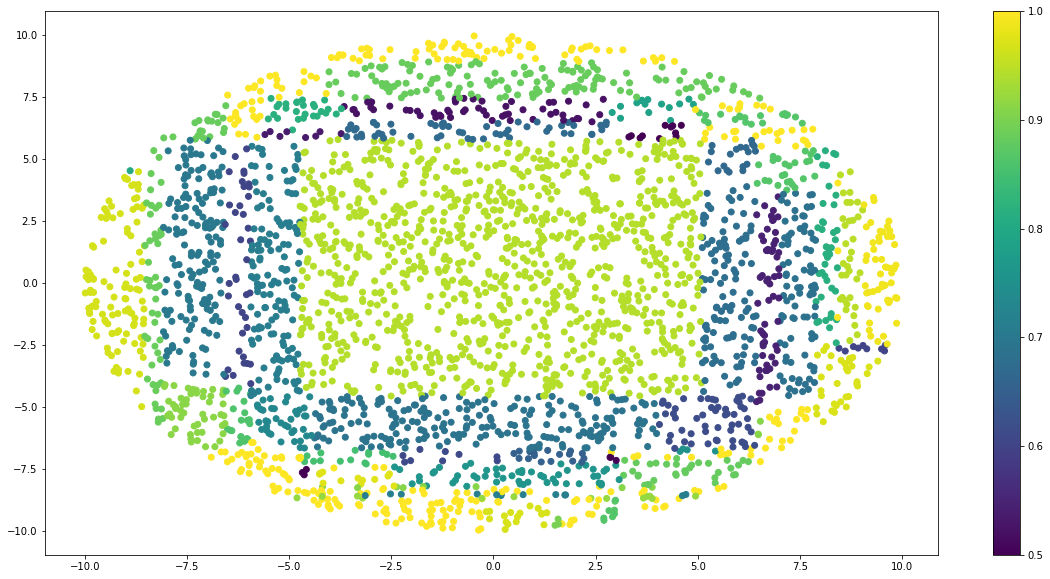

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=7)
dt.fit(X_train, y_train)
log_loss(y_test, dt.predict_proba(X_test))

predict_tree = dt.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = [max(x) for x in dt.predict_proba(X_test)]

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree_proba)
plt.colorbar()
plt.show()

Adding forest to improve performance. In this case we do not expect huge shift since there are only two distinctive classes of the same size

Model accuracy 0.8318181818181818


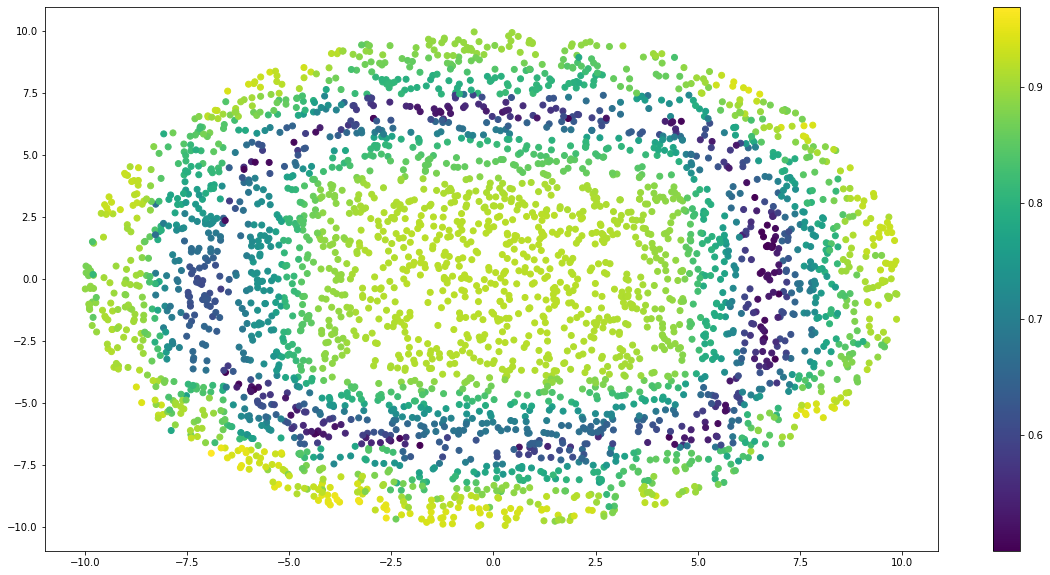

In [28]:
from sklearn.ensemble import RandomForestClassifier

#########################################
rf = RandomForestClassifier(max_depth=7,n_estimators=1000)
rf.fit(X_train, y_train)
log_loss(y_test, rf.predict_proba(X_test))

predict_forest = rf.predict(X_test)
print(f'Model accuracy {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = [max(x) for x in rf.predict_proba(X_test)]

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest_proba)
plt.colorbar()
plt.show()



**3.  Neural Network**

Since this is a simple task with tabular data, a tiny network is created. As the task is binary classification, sigmoid activation functions and binary lossess are used 

In [ ]:
!pip install pytorch_lightning

In [ ]:
!pip install torchmetrics

In [6]:
from torchmetrics import Accuracy

In [7]:
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim
import torch.utils.data as data_utils

In [8]:
# Подгружаем tensorflow 
import tensorflow as tf
keras = tf.keras

print(tf.__version__)
print(keras.__version__) 

from tensorflow.keras.models import Sequential   
import tensorflow.keras.layers as L              
import tensorflow.keras.optimizers as opt        
from tensorflow.keras.utils import to_categorical

2.8.2
2.8.0


In [30]:
keras.backend.clear_session()
def get_my_first_model( ):
    acc = Accuracy()

    ###########################################################
    # Ваш код! 
    model = Sequential(name = 'Na_mne_cash')  
    
    model.add(L.Dense(5, input_dim = X_train.shape[1], kernel_initializer='random_normal'))
    model.add(L.Activation('sigmoid'))

    model.add(L.Dense(5, kernel_initializer='random_normal'))
    model.add(L.Activation('sigmoid'))

    model.add(L.Dense(2, activation='sigmoid', kernel_initializer = 'random_normal'))
    
    ###########################################################

    optimizer = opt.Adam(lr=1e-2)

    model.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
                  metrics=['acc'], 
                  optimizer=optimizer)
    
    return model

model = get_my_first_model( )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [31]:
model.summary()

Model: "Na_mne_cash"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 activation (Activation)     (None, 5)                 0         
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 activation_1 (Activation)   (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
54/54 [==============================] - 3s 17ms/step - loss: 0.6933 - acc: 0.5022 - val_loss: 0.6937 - val_acc: 0.5015
Epoch 2/100
54/54 [==============================] - 1s 11ms/step - loss: 0.6933 - acc: 0.5002 - val_loss: 0.6942 - val_acc: 0.5015
Epoch 3/100
54/54 [==============================] - 0s 8ms/step - loss: 0.6927 - acc: 0.5123 - val_loss: 0.6918 - val_acc: 0.5015
Epoch 4/100
54/54 [==============================] - 1s 10ms/step - loss: 0.6827 - acc: 0.5638 - val_loss: 0.6640 - val_acc: 0.5978
Epoch 5/100
54/54 [==============================] - 0s 7ms/step - loss: 0.6078 - acc: 0.7369 - val_loss: 0.5291 - val_acc: 0.8306
Epoch 6/100
54/54 [==============================] - 0s 8ms/step - loss: 0.4733 - acc: 0.8325 - val_loss: 0.4191 - val_acc: 0.8396
Epoch 7/100
54/54 [==============================] - 1s 9ms/step - loss: 0.4058 - acc: 0.8338 - val_loss: 0.3859 - val_acc: 0.8455
Epoch 8/100
54/54 [==============================] - 0s 7ms/step - loss: 0.3841 

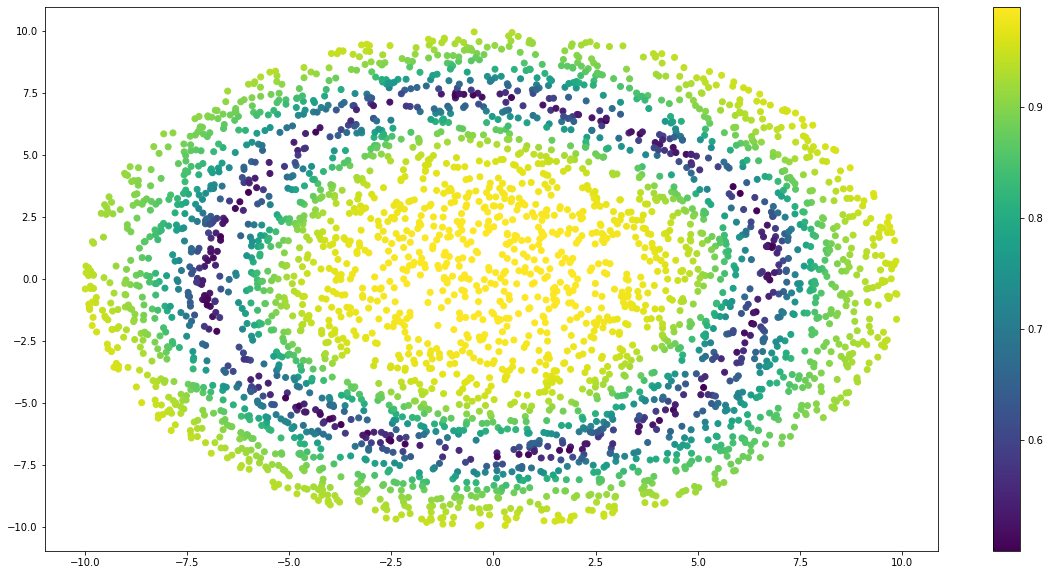

In [32]:
hist = model.fit(X_train, to_categorical(y_train), validation_split=0.2, epochs=100, verbose=1, batch_size=100)

predict_neural = [max(x) for x in model.predict(X_test)]
predict_classes = [list(x).index(max(x)) for x in model.predict(X_test)]

print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')
#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_neural)
plt.colorbar()
plt.show()

We see that even though NN did not improve accuracy significantly, though now probabilities are higher, meaning this model is more "secure" about its predictions, which could be considered as an improvement of its kind.

Видим, что нейронная сеть не улучшила качество предсказания, однако, теперь вероятности стали выше. Это значит, что модель стала "увереннее" в своих предсказаниях, что также может считаться улучшением